## Libs

In [1]:
# %pip install pandas
# %pip install wordcloud
# %pip install nltk
# %pip install matplotlib

In [2]:
import pandas as pd
import nltk
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

## Load Data

In [3]:
df_export = pd.read_csv('../data/2023-55553.csv', sep=';')
df_planilha = pd.read_csv('../data/Propostas Brasil Participativo 10 de Maio a 22 de Junho.xlsx - TagsCategorias.csv', skipfooter=1)
df = pd.merge(df_export, df_planilha, left_on='id', right_on='ID', how='left')

/tmp/ipykernel_1552/2909528549.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_planilha = pd.read_csv('../data/Propostas Brasil Participativo 10 de Maio a 22 de Junho.xlsx - TagsCategorias.csv', skipfooter=1)


## Pre-Process Data

In [4]:
# Remove (state = rejected) or (state = withdrawn)
df = df[df['state'] != 'rejected']
df = df[df['state'] != 'withdrawn']

# Remove html tags from body
df['body/pt-BR'] = df['body/pt-BR'].str.replace(r'<[^>]*>', '', regex=True)

## Pre-Process Body/Title/Categoria 1/Categoria 2 for Word Cloud

In [5]:
# Replace any non-alpha caractere with nothing, but alpha
df['body/pt-BR'] = df['body/pt-BR'].str.replace(r'[^a-zA-ZÀ-ú]', ' ', regex=True).str.lower()
df['title/pt-BR'] = df['title/pt-BR'].str.replace(r'[^a-zA-ZÀ-ú]', ' ', regex=True).str.lower()
df['Categoria 1'] = df['Categoria 1'].str.replace(r'[^a-zA-ZÀ-ú]', ' ', regex=True).str.lower()
df['Categoria 2'] = df['Categoria 2'].str.replace(r'[^a-zA-ZÀ-ú]', ' ', regex=True).str.lower()

# Concatenate Body with Title and Categorias
df['processed_text'] = df['body/pt-BR'] + ' ' + df['title/pt-BR'] + ' ' + df['Categoria 1'] + ' ' + df['Categoria 2']
df['processed_text'].dropna() 

1       disponibilizar uma ferramenta para todo public...
4       objetivo  ampliar o acesso às ações e serviços...
5       objetivo  reduzir a pobreza por meio da transf...
6       objetivo  assegurar serviços de comunicações e...
7       objetivo  fortalecer a atenção primária à saúd...
                              ...                        
5390    a br     é uma rodovia federal que desempenha ...
5393    macrodrenagem e revitalização  da bacia hidrog...
5394    abertura de novos concursos e criação de novas...
5396    política nacional de controle populacional de ...
5397    utilizar o salário mínimo calculado pelo diees...
Name: processed_text, Length: 1728, dtype: object

## Portuguese Stopwords

In [6]:
# Get portuguese stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anapaula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Generate and Plot Word-Cloud for each Ministério

In [7]:
# Get Processed Ministerios names
ministerios = [ministerio.lower() for ministerio in df['category/name/pt-BR'].dropna().unique()]
ministerios

['casa civil',
 'trabalho e emprego',
 'saúde',
 'desenvolvimento e assistência social, família e combate à fome',
 'comunicações',
 'agricultura e pecuária',
 'transportes',
 'cidades',
 'ciência, tecnologia e inovação',
 'relações institucionais',
 'comunicação social',
 'turismo',
 'cultura',
 'mulheres',
 'direitos humanos e cidadania',
 'educação',
 'desenvolvimento agrário e agricultura familiar',
 'fazenda',
 'justiça e segurança pública',
 'banco central',
 'povos indígenas',
 'esporte',
 'gestão e inovação em serviços públicos',
 'igualdade racial',
 'infraestrutura',
 'meio ambiente e mudança do clima',
 'planejamento e orçamento',
 'desenvolvimento, indústria, comércio e serviços',
 'secretaria geral da presidência da república',
 'portos e aeroportos',
 'defesa',
 'integração e desenvolvimento regional',
 'minas e energia',
 'previdência social',
 'pesca e aquicultura',
 'controladoria-geral da união',
 'segurança institucional',
 'relações exteriores',
 'outros',
 'advocac

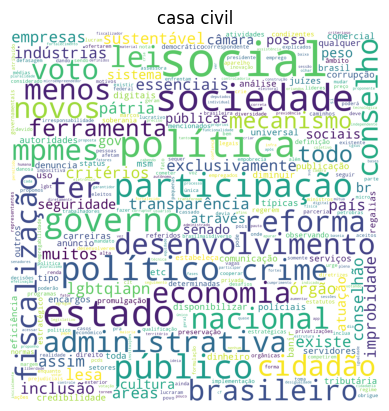

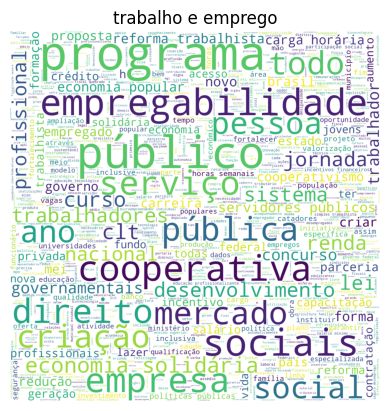

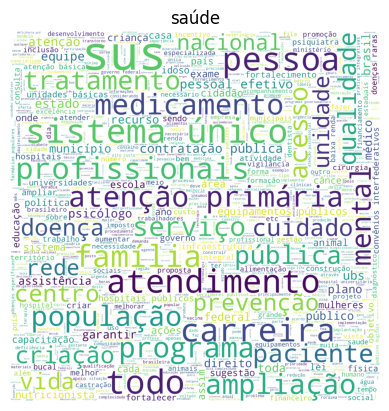

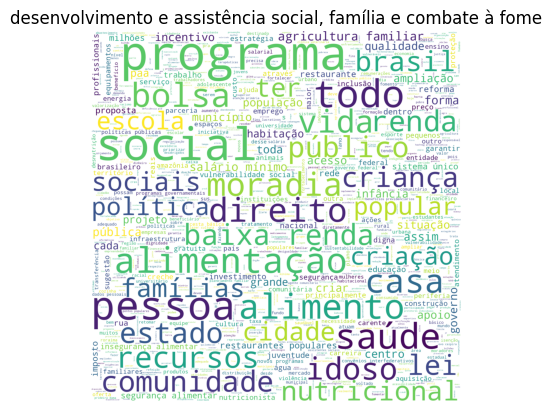

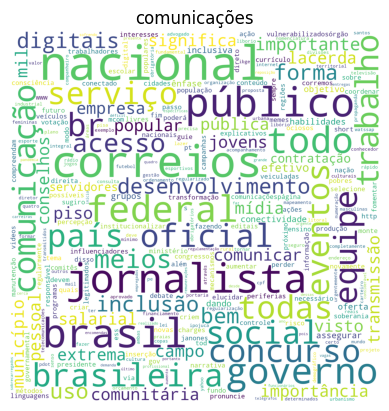

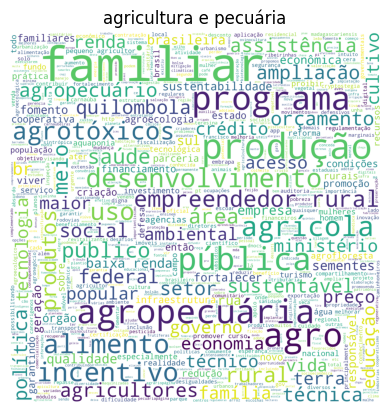

In [8]:
for ministerio in ministerios:
    # Generate a word cloud, removing words from ministerio name
    wc = WordCloud(background_color="white", max_words=1000, stopwords=stopwords + ministerio.split(' '), max_font_size=256, random_state=42, width=2000, height=2000)
    wordcloud = wc.generate(' '.join(df[df['category/name/pt-BR'].str.lower() == ministerio]['processed_text'].dropna()))
    
    # Plot the wordcloud
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(ministerio)
    plt.show()